### Lending Club Case Study ###


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



EDA is a crucial step in understanding the dataset and extracting insights from it. Here are some steps involved in EDA to identify driver variables in identifying whether custom will default or not:

**Data Collection:**
- Gather the dataset from relevant sources, ensuring it includes all necessary attributes for analysis.

**Data Cleaning:**
- **Handle missing values:** Identify missing values in the dataset and decide how to handle them (imputation, deletion, etc.).
- **Remove duplicates:** Check for and remove any duplicate rows in the dataset.
- **Data type conversion:** Convert data types if necessary (e.g., converting string values to numeric).

**Data Exploration:**
- **Summary statistics:** Compute descriptive statistics (mean, median, min, max, etc.) for numeric variables.
- **Univariate analysis:** Analyze individual variables to understand their distribution using histograms, box plots, etc.
- **Bivariate analysis:** Explore relationships between pairs of variables using scatter plots, correlation matrices, etc.

**Data Visualization:**
- Use various visualization techniques such as histograms, box plots, scatter plots, correlation matrices, etc., to visually represent the data and gain insights.
This Markdown text will 

<h1 style="font-size: 17px; color: blue;">Data Collection</h1>


In [35]:
#Read the  LOAN DataSet from external url
df = pd.read_csv("/Users/ajayramesh/Documents/AIML/LendingClubCaseStudy/loan.csv", low_memory=False)
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [36]:
# Get the shape of the DataFrame (number of rows, number of columns)
shape = df.shape
print("Shape of the dataset:", shape)


Shape of the dataset: (39717, 111)


In [5]:
# Get a concise summary of the DataFrame including data types, non-null values, etc.
description = df.describe()
print("\nDescription of the dataset:")
print(description)


Description of the dataset:
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.04040

<h1 style="font-size: 17px; color: blue;">Data Cleaning</h1>


In [37]:
# List of columns to remove
columns_to_remove = ['id', 'member_id', 'url', 'desc', 'policy_code', 
                      'annual_inc_joint','last_credit_pull_d','mths_since_last_delinq',
                     'num_tl_90g_dpd_24m','pub_rec','initial_list_status','num_tl_op_past_12m',
                     'pct_tl_nvr_dlq','percent_bc_gt_75','tax_liens',
                     'tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']


# Remove columns from the DataFrame
cleaned_df = df.drop(columns=columns_to_remove)

In [38]:
# Assuming df is your DataFrame containing the zip code column
# Create two new columns for the main zip code column from zip code column by extracting first 3 charactors
df['main_zip'] = df['zip_code'].str[:3]

# Drop the original zip_code column
df.drop(columns=['zip_code'], inplace=True)

In [40]:

print(df['main_zip'])
df['main_zip'] = df['main_zip'].astype(float)

# Determine the minimum and maximum values of zip_code
min_zipcode = df['main_zip'].min()
max_zipcode = df['main_zip'].max()
print(max_zipcode)

# Define the number of bins and calculate bin width
num_bins = 9  # You can adjust this as needed
bin_width = (max_zipcode - min_zipcode) / num_bins

# Create zip_code_ranges based on the bin width
main_zip_ranges = [(min_zipcode + i * bin_width, min_zipcode + (i + 1) * bin_width) for i in range(num_bins)]

# Function to categorize zipcodes into ranges
def categoriz_zip_code(zipcode):
    for i, (start, end) in enumerate(main_zip_ranges):
        if start <= zipcode < end:
            return f'{start:.2f}-{end:.2f}'
    return f'>= {main_zip_ranges[-1][1]:.2f}'

# Apply the function to create the new range column
df['main_zip_range'] = df['main_zip'].apply(categoriz_zip_code)
print(df['main_zip_range'])



0        860.0
1        309.0
2        606.0
3        917.0
4        972.0
         ...  
39712    802.0
39713    274.0
39714     17.0
39715    208.0
39716     27.0
Name: main_zip, Length: 39717, dtype: float64
999.0
0        778.56-888.78
1        227.44-337.67
2        558.11-668.33
3        888.78-999.00
4        888.78-999.00
             ...      
39712    778.56-888.78
39713    227.44-337.67
39714      7.00-117.22
39715    117.22-227.44
39716      7.00-117.22
Name: main_zip_range, Length: 39717, dtype: object


In [41]:



# Convert int_rate column to numeric if it's not already in numeric format
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

# Determine the minimum and maximum values of int_rate
min_int_rate = df['int_rate'].min()
max_int_rate = df['int_rate'].max()

# Define the number of bins and calculate bin width
num_bins = 6  # You can adjust this as needed
bin_width = (max_int_rate - min_int_rate) / num_bins

# Create int_rate_ranges based on the bin width
int_rate_ranges = [(min_int_rate + i * bin_width, min_int_rate + (i + 1) * bin_width) for i in range(num_bins)]

# Function to categorize interest rates into ranges
def categorize_int_rate(int_rate):
    for i, (start, end) in enumerate(int_rate_ranges):
        if start <= int_rate < end:
            return f'{start:.2f}-{end:.2f}'
    return f'>= {int_rate_ranges[-1][1]:.2f}'

# Apply the function to create the new range column
df['int_rate_range'] = df['int_rate'].apply(categorize_int_rate)



In [69]:
print(df.int_rate_range)


0         8.62-11.81
1        15.01-18.20
2        15.01-18.20
3        11.81-15.01
4        11.81-15.01
            ...     
39712      5.42-8.62
39713     8.62-11.81
39714      5.42-8.62
39715      5.42-8.62
39716    11.81-15.01
Name: int_rate_range, Length: 39717, dtype: object


In [43]:
# Convert annual_inc column to string and remove any non-numeric characters
df['annual_inc'] = df['annual_inc'].astype(str).str.replace(r'\D', '', regex=True)

# Convert the cleaned annual_inc column to numeric format, coercing errors to NaN
df['annual_inc'] = pd.to_numeric(df['annual_inc'], errors='coerce')

# Drop rows with NaN values in annual_inc column
df.dropna(subset=['annual_inc'], inplace=True)

# Drop rows with values less than a certain threshold (if needed)
# For example, if we assume annual income less than $10,000 is invalid
df = df[df['annual_inc'] >= 500]
# Convert annual_inc column to numeric if it's not already in numeric format
df['annual_inc'] = pd.to_numeric(df['annual_inc'], errors='coerce')


# Determine the minimum and maximum values of annual_inc
min_annual_inc = df['annual_inc'].min()
max_annual_inc = df['annual_inc'].max()

# Define the number of bins and calculate bin width
num_bins = 6  # You can adjust this as needed
bin_width = (max_annual_inc - min_annual_inc) / num_bins

# Create annual_inc_ranges based on the bin width
annual_inc_ranges = [(min_annual_inc + i * bin_width, min_annual_inc + (i + 1) * bin_width) for i in range(num_bins)]
annual_inc_ranges = [(min_annual_inc, 10000), (10000, 50000), (50000, 300000), (300000, 1500000), (1500000, 3000000),
                    (3000000, 7500000),(7500000,max_annual_inc)]

# Function to categorize annual income into ranges
def categorize_annual_inc(annual_inc):
    for i, (start, end) in enumerate(annual_inc_ranges):
        if start <= annual_inc < end:
            return f'{start:.2f}-{end:.2f}'
    return f'>= {annual_inc_ranges[-1][1]:.2f}'

# Apply the function to create the new range column
df['annual_inc_range'] = df['annual_inc'].apply(categorize_annual_inc)


<h1 style="font-size: 17px; color: blue;">Univariant Analysis</h1>


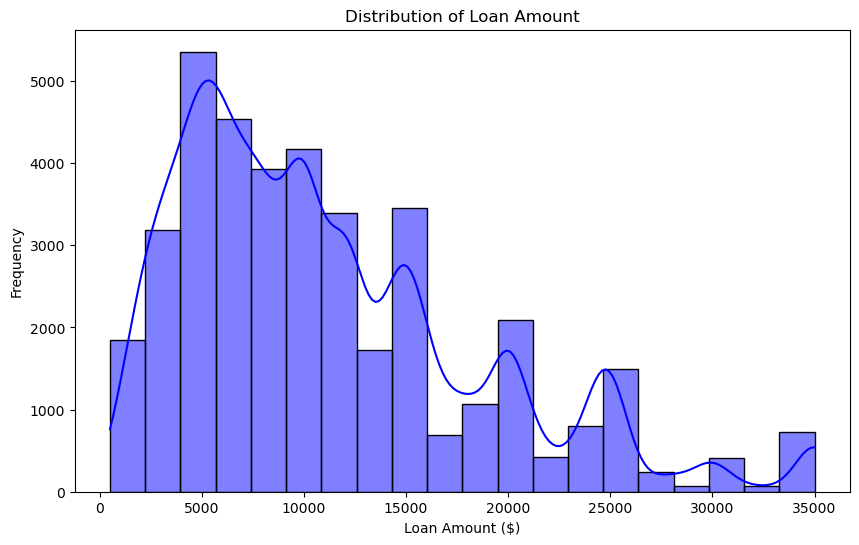

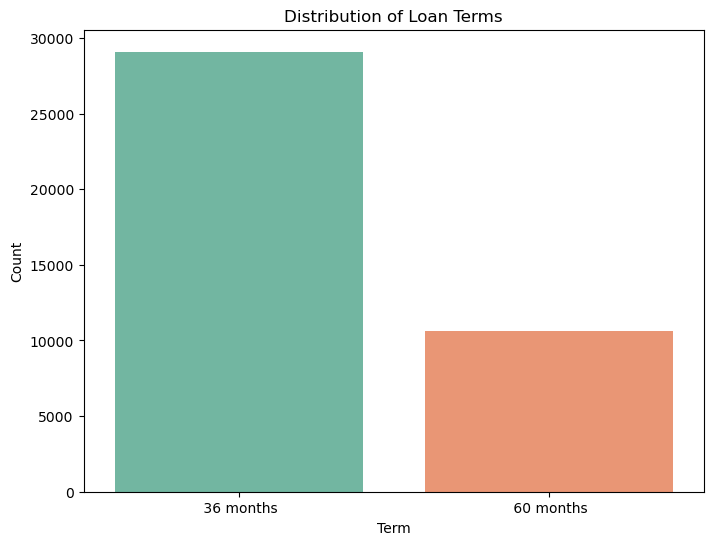

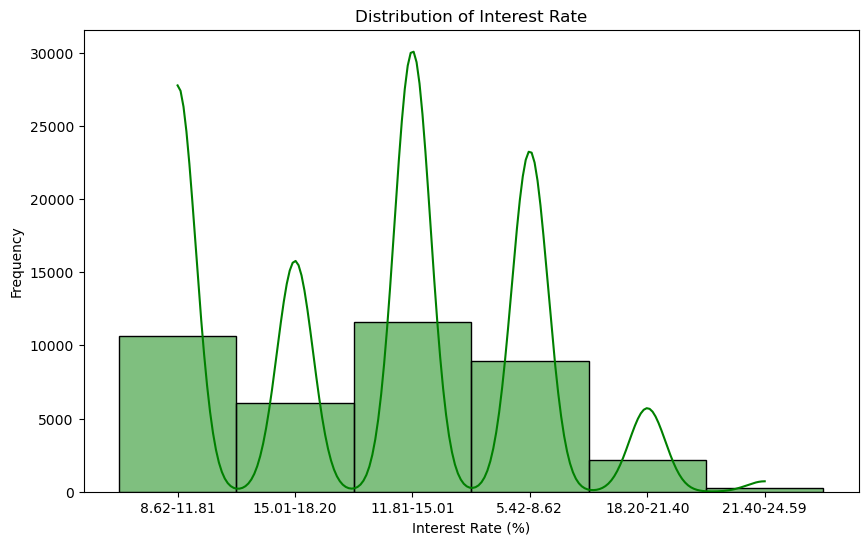

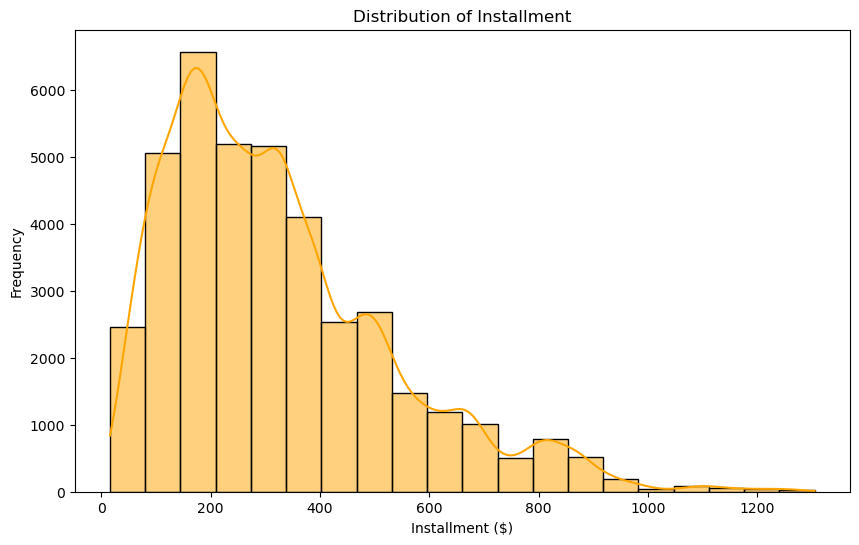

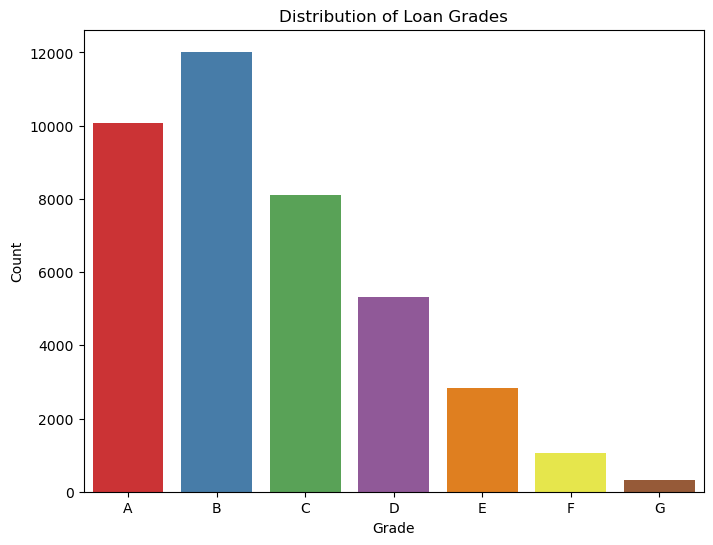

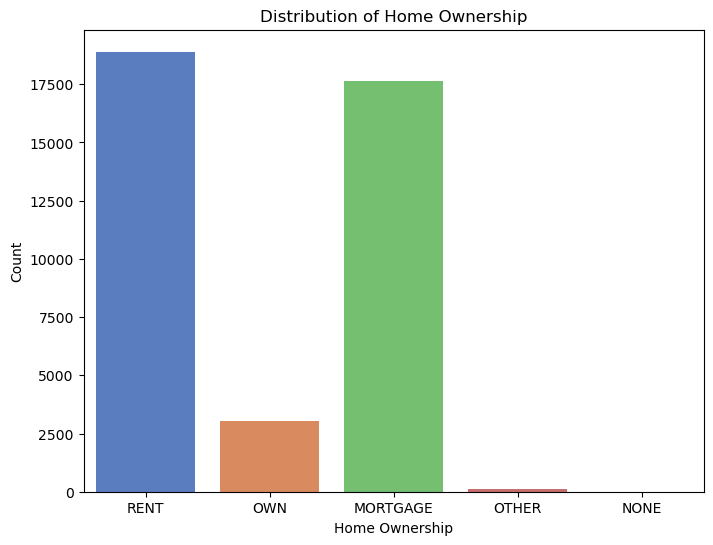

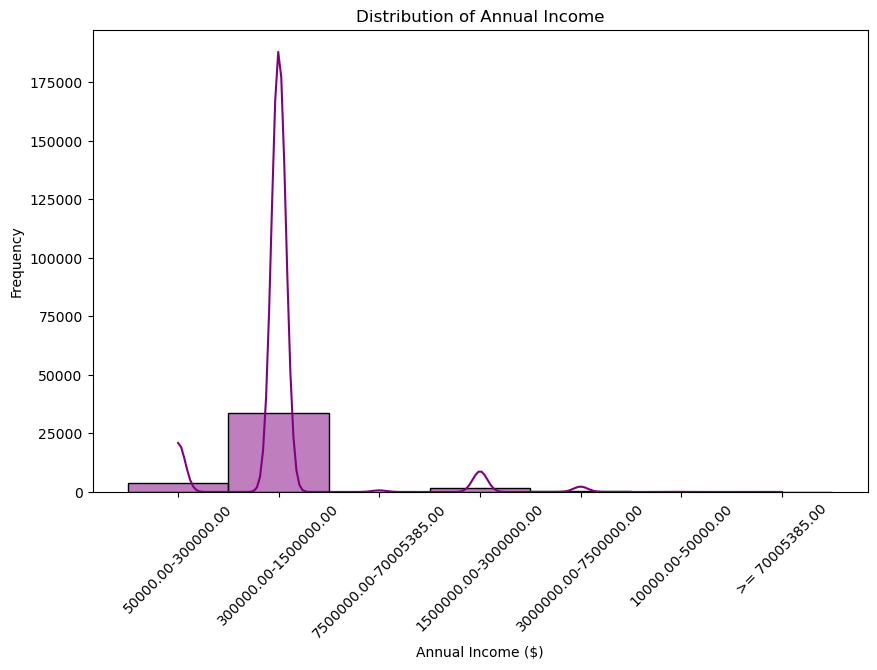

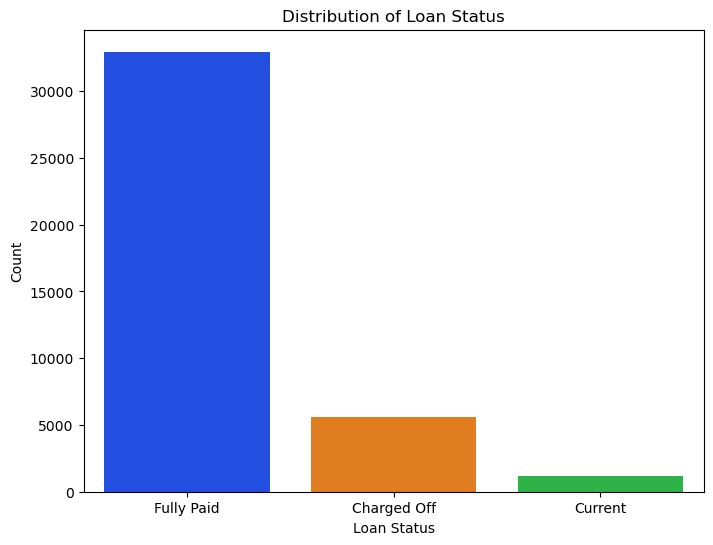

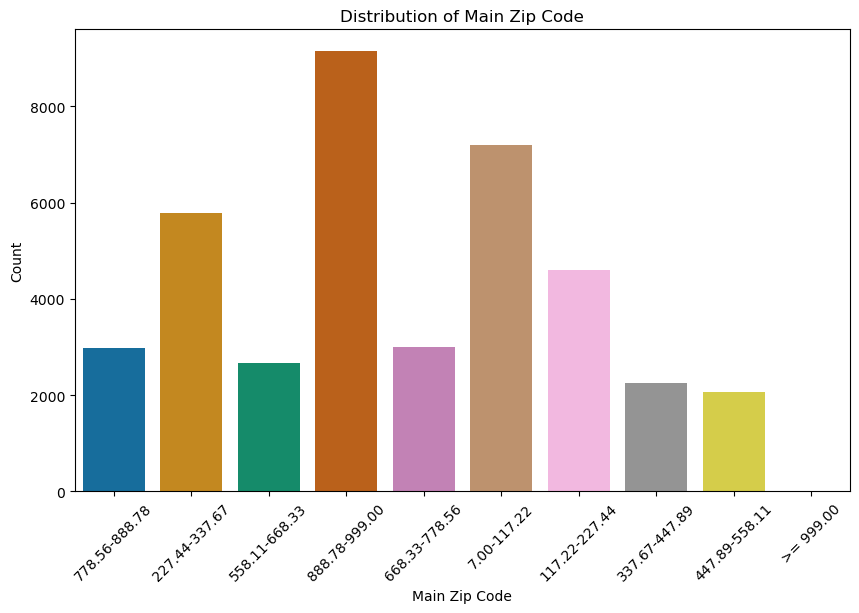

In [44]:
# 1. Loan Amount (loan_amnt)
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

# 2. Term (term)
plt.figure(figsize=(8, 6))
sns.countplot(x='term', data=df, palette='Set2')
plt.title('Distribution of Loan Terms')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

# 3. Interest Rate (int_rate)
plt.figure(figsize=(10,6))
sns.histplot(df['int_rate_range'], bins=15, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# 4. Installment (installment)
plt.figure(figsize=(10, 6))
sns.histplot(df['installment'], bins=20, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Installment')
plt.xlabel('Installment ($)')
plt.ylabel('Frequency')
plt.show()

# 5. Grade (grade)
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', data=df, palette='Set1', order=sorted(df['grade'].unique()))
plt.title('Distribution of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


# 6. Home Ownership (home_ownership)
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', data=df, palette='muted')
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

# 7. Annual Income (annual_inc)
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_inc_range'], bins=20, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 8. Loan Status (loan_status)
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df, palette='bright')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# 9. Main Zip Code (main_zip)
plt.figure(figsize=(10, 6))
sns.countplot(x='main_zip_range', data=df, palette='colorblind')
plt.title('Distribution of Main Zip Code')
plt.xlabel('Main Zip Code')
plt.xticks(rotation=45)

plt.ylabel('Count')
plt.show()


<h1 style="font-size: 17px; color: blue;">Univariant Analysis Inference</h1>


Loan Amount (loan_amnt):
- This suggests that borrowers often request moderate to high loan amounts.
The peak amount being just above 5000

Term (term):
- The majority of loans have a term of 36 months, indicating that borrowers prefer shorter repayment periods. 
- However, a notable portion of loans also have a term of 60 months, indicating longer repayment commitments.

Interest Rate (int_rate):
- Interest rates vary widely, with a significant portion falling between 11% and 15%. 
- Some loans have relatively high-interest rates exceeding 15%, suggesting higher risk associated with those loans.

Installment (installment):
- Monthly installments are distributed across a range of values,most between 0 to 400 with peak being close to 200 
- This indicates variability in repayment obligations, with some borrowers facing higher monthly payment burdens.

Grade (grade):
- Loan grades are predominantly in the B and C categories, indicating moderate risk levels. 
- However, there is also a presence of loans in lower-grade categories (e.g., D and E), which may represent higher risk.


Home Ownership (home_ownership):
- Renters constitute a significant portion of borrowers, followed by those with mortgages. 
- This indicates a diverse mix of home ownership statuses among borrowers.

Annual Income (annual_inc):
- Annual incomes vary widely, with a range of 3,00,000 to 15,00,000 have a more possibility of applying for a loan
- However, there is a notable presence of lower-income borrowers, which may pose higher default risk.

Loan Status (loan_status):
- The majority of loans are labeled as "Fully Paid," indicating successful repayment. 
- However, there is also a portion of loans labeled as "Charged Off," indicating default or non-repayment.

Main Zip Code (main_zip):
- The distribution of main zip codes shows variations in borrower locations. 
- Zip coe between 888 and 999 have taken more loans.


<h1 style="font-size: 17px; color: blue;">Bivariant Analysis</h1>


In [49]:
# Identify loan status column
loan_status_column = 'loan_status'

# Identify categorical variables
categorical_variables = [
    'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',
    'purpose','addr_state', 'initial_list_status', 'term', 'application_type','int_rate_range',
    'revol_util','main_zip_range'
]

# Identify continuous numerical variables
numerical_variables = [
    'loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti',
    'revol_bal', 'total_acc', 'open_acc'
 ]

# Identify time-related variables
time_variables = [
    'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'
]

In [50]:
# Group the dataset by loan status
grouped_data = df.groupby('loan_status')


In [46]:
# View the groups
for status, group in grouped_data:
    print("Loan Status:", status)
    print(group.head(2))  # Displaying the first few rows of each group for inspection

Loan Status: Charged Off
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
1  1077430    1314167       2500         2500           2500.0   60 months   
8  1071795    1306957       5600         5600           5600.0   60 months   

   int_rate  installment grade sub_grade  ... pub_rec_bankruptcies tax_liens  \
1     15.27        59.83     C        C4  ...                  0.0       0.0   
8     21.28       152.39     F        F2  ...                  0.0       0.0   

  tot_hi_cred_lim  total_bal_ex_mort total_bc_limit  \
1             NaN                NaN            NaN   
8             NaN                NaN            NaN   

  total_il_high_credit_limit main_zip main_zip_range int_rate_range  \
1                        NaN    309.0  227.44-337.67    15.01-18.20   
8                        NaN    958.0  888.78-999.00    18.20-21.40   

       annual_inc_range  
1  300000.00-1500000.00  
8  300000.00-1500000.00  

[2 rows x 114 columns]
Loan Status: Curr

<h1 style="font-size: 17px; color: blue;">Categorical Bivariant Amalysis</h1>


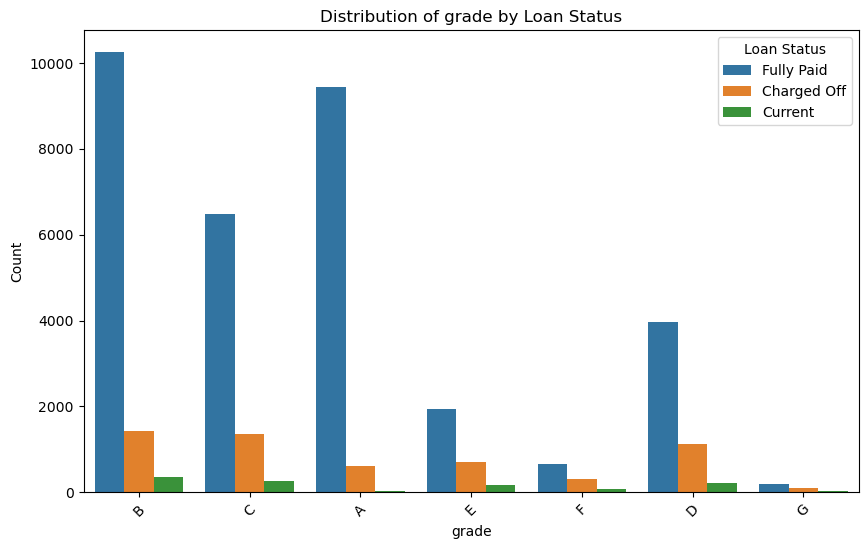

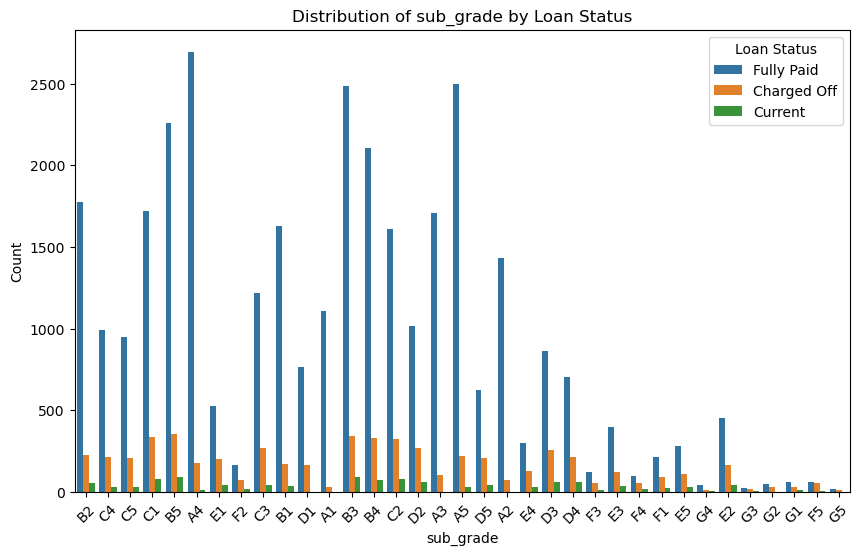

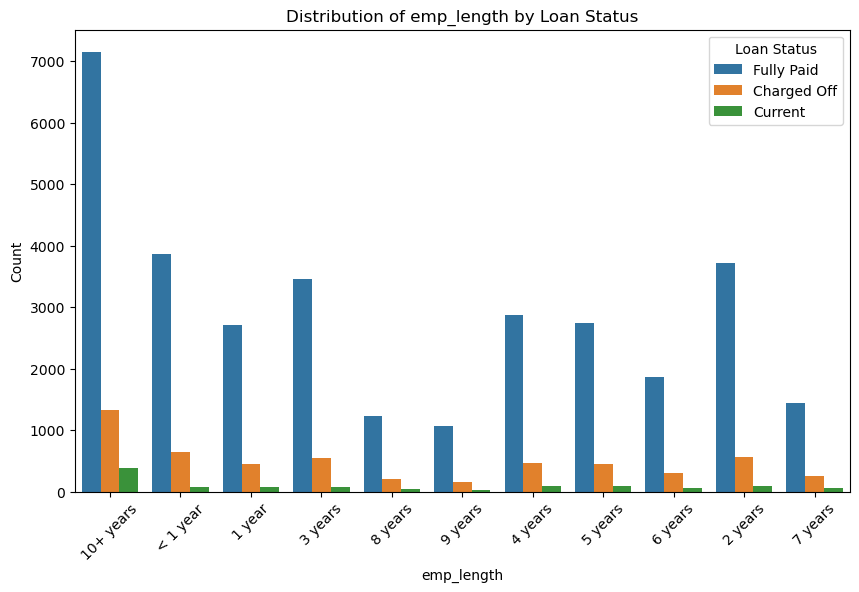

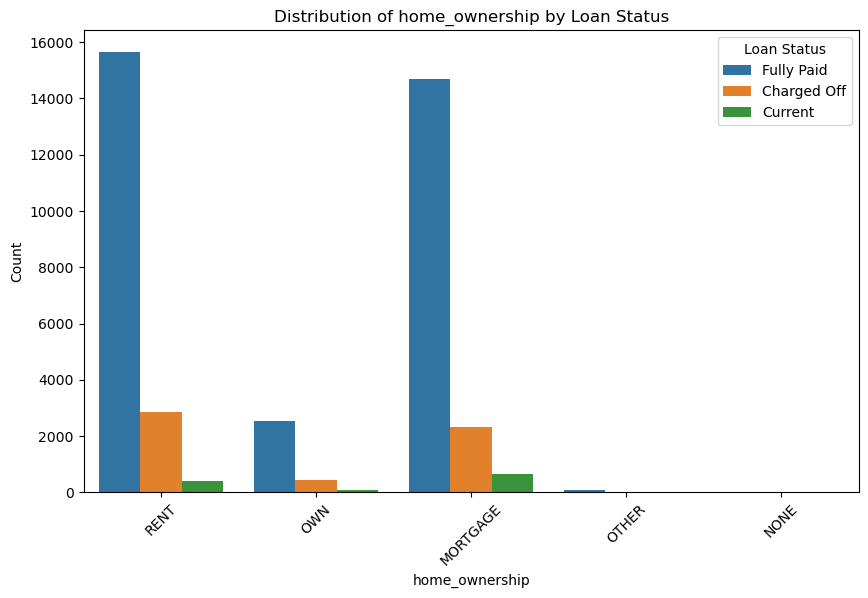

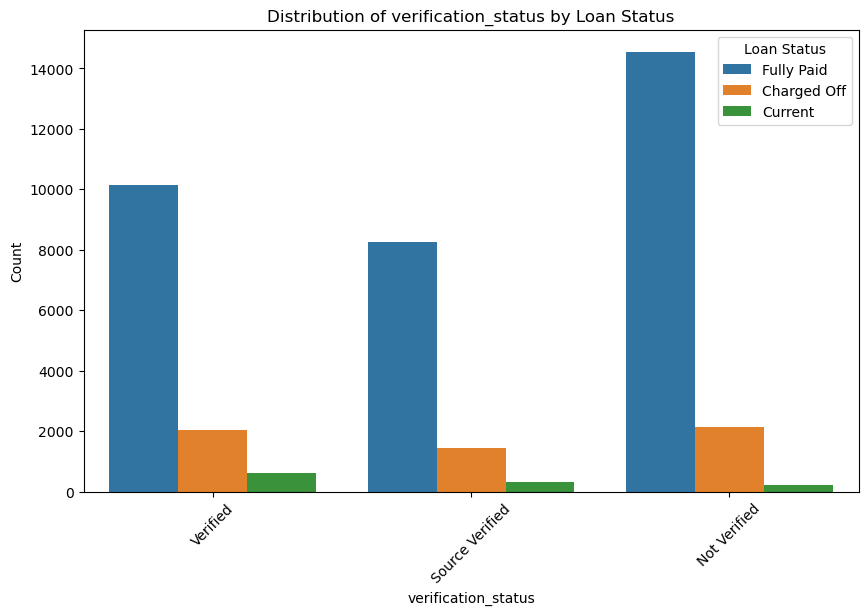

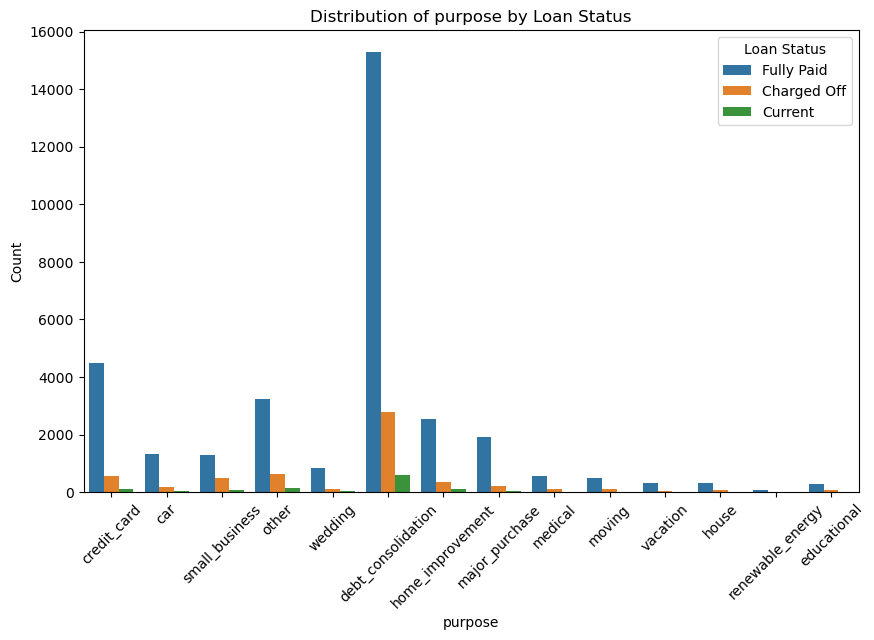

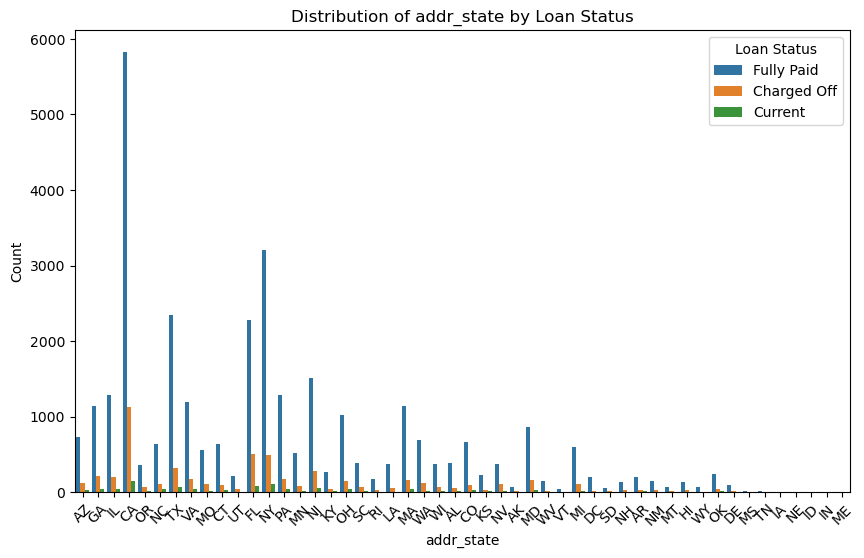

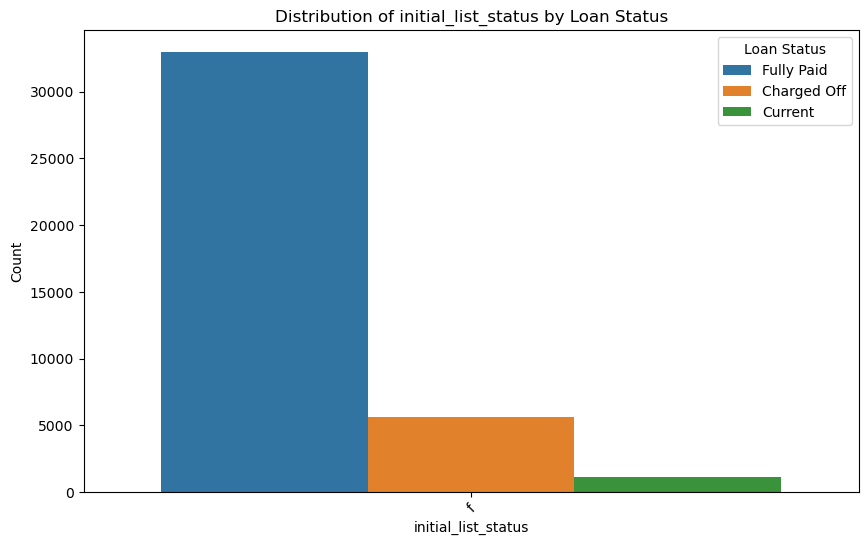

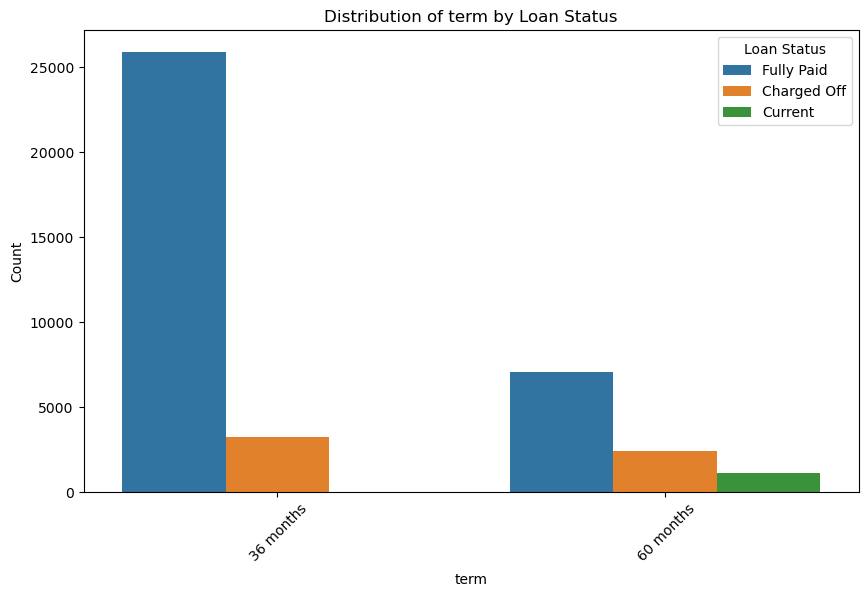

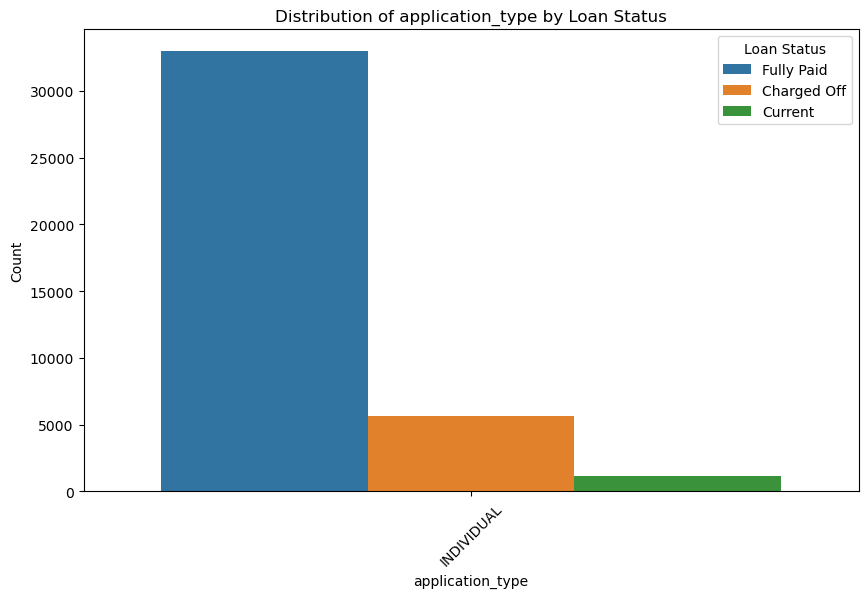

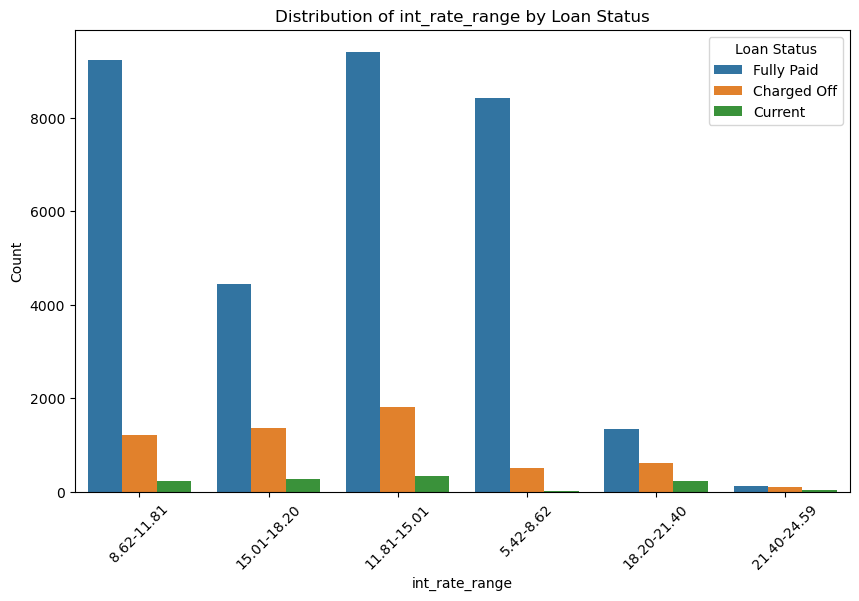

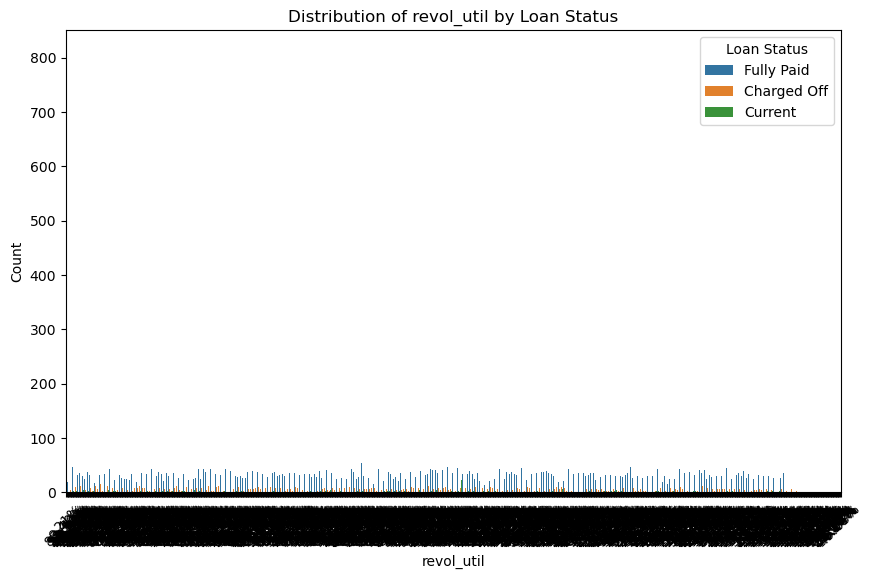

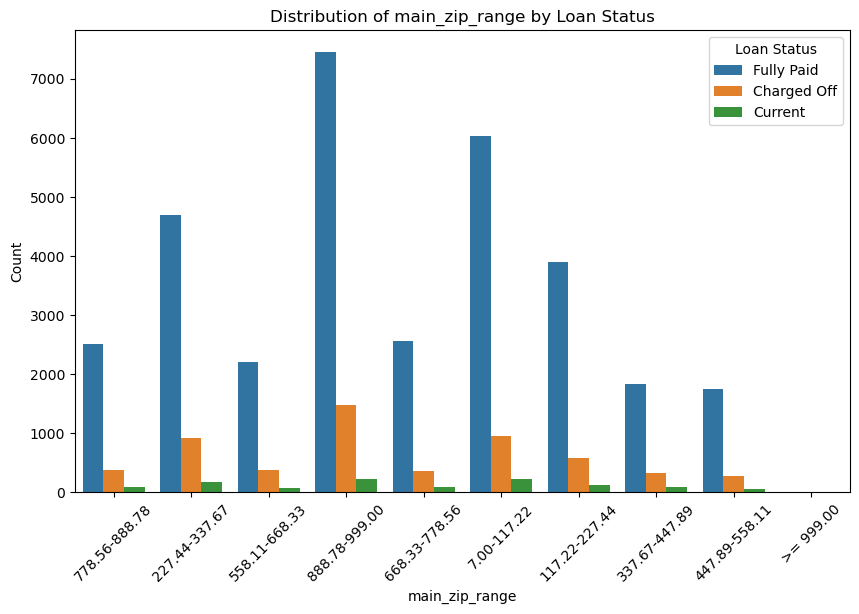

In [51]:
# Define a function to create bar charts for categorical variables against loan status
for var in categorical_variables:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=var, hue='loan_status')
        plt.title(f'Distribution of {var} by Loan Status')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Loan Status', loc='upper right')
        plt.show()


<h1 style="font-size: 17px; color: blue;">Categorical Bivariant Inference</h1>


- **Grade and Sub-grade:**
  - Higher grade loans (A, B) have a lower proportion of charged-off loans compared to lower grade loans (C, D).
  - Similarly, within each grade, lower sub-grades tend to have higher proportions of charged-off loans.

- **Employment Length:**
  - Borrowers with longer employment lengths (e.g., 10+ years) tend to have a lower proportion of charged-off loans compared to those with shorter employment lengths.

- **Home Ownership:**
  - Borrowers who rent their homes have a slightly higher proportion of charged-off loans compared to those who own homes or have a mortgage.

- **Verification Status:**
  - Loans with verified income tend to have a slightly lower proportion of charged-off loans compared to those with income not verified.

- **Purpose:**
  - Debt consolidation is the most common purpose for loans, and it also has a higher proportion of charged-off loans compared to other purposes.

- **Address State:**
  - The distribution of loan status across states varies, CA and NY seems to have higher charged off.

- **Initial List Status:**
  - Loans with an initial list status of 'f' (whole) have a slightly higher proportion of charged-off loans compared to those with a status of 'w' (fraction).

- **Term:**
  - Loans with a term of 60 months have a slightly higher proportion of charged-off loans compared to those with a term of 36 months.

- **Application Type:**
  - Individual applications have a lower proportion of charged-off loans compared to joint applications.

- **Interest Rate (int_rate):**
  - Loans with higher interest rates tend to have a higher proportion of charged-off loans.

- **Zip Code (main_zip_range):**
  - Zip codes with range 227 and 337 have higher proportion of paying loans
7

<h1 style="font-size: 17px; color: blue;">Numerical Bivariant Analysis</h1>


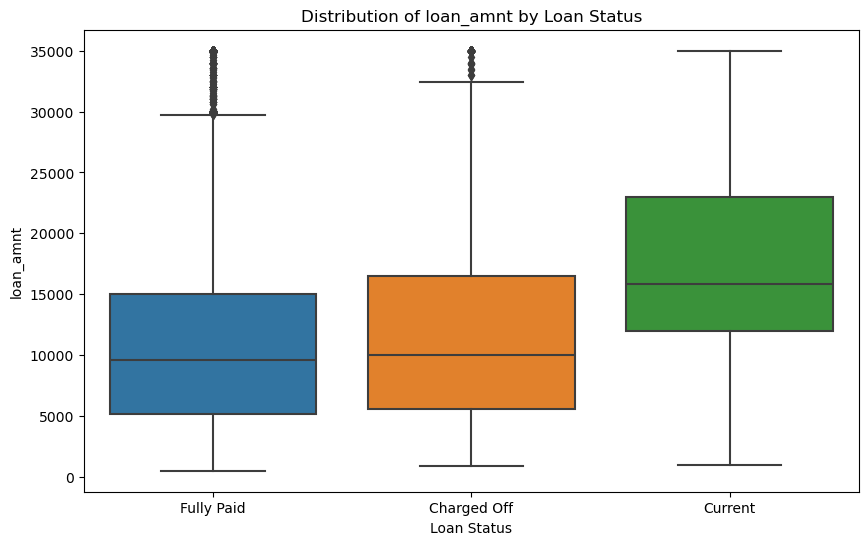

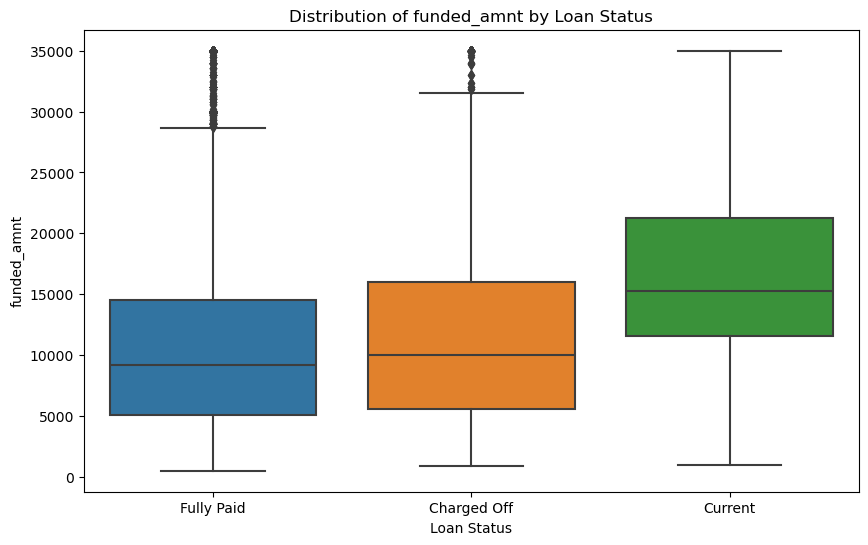

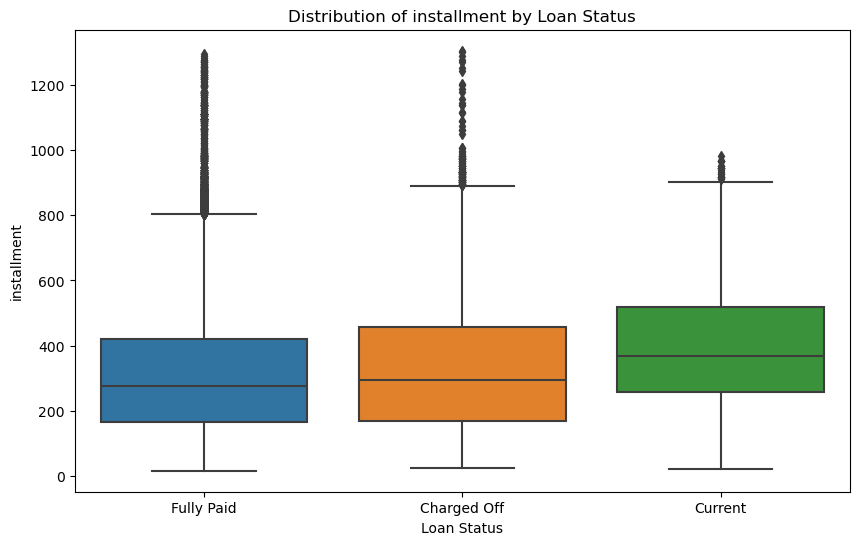

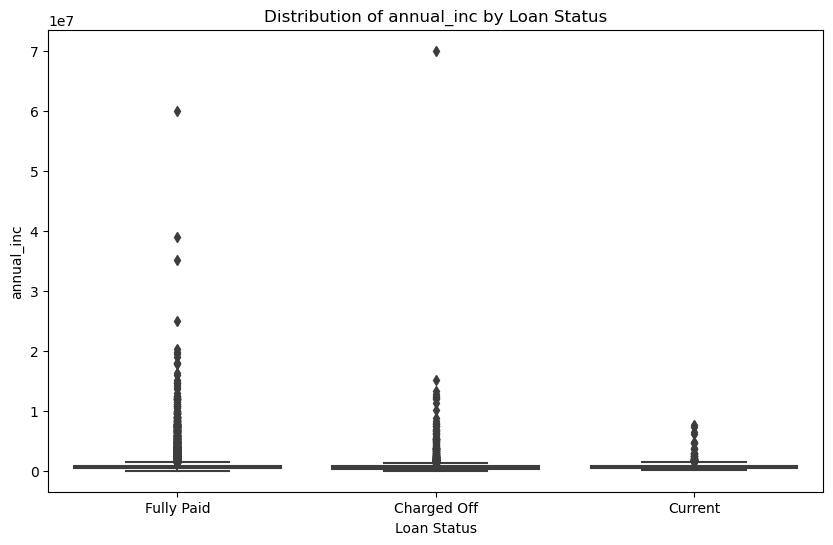

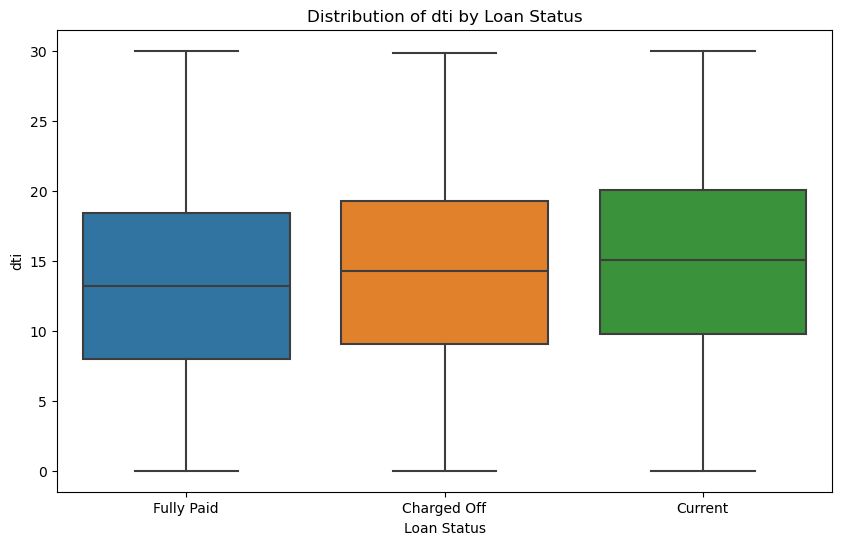

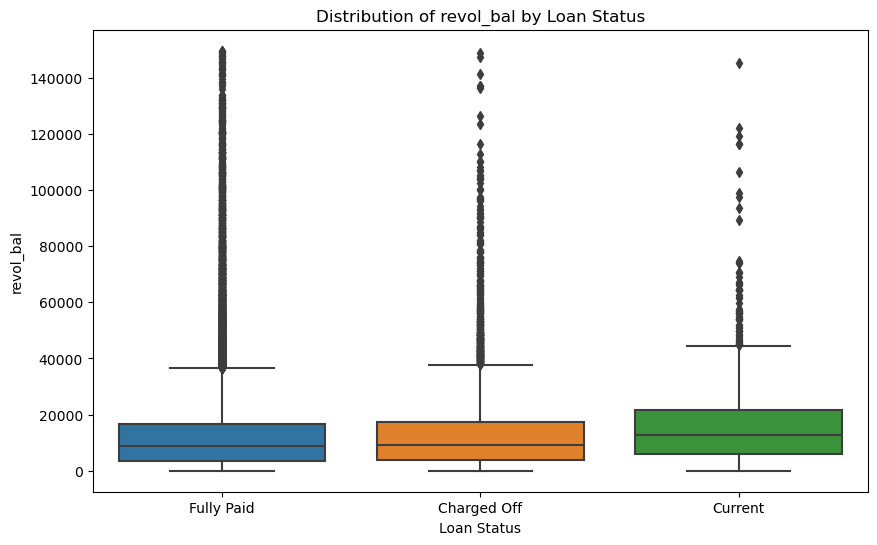

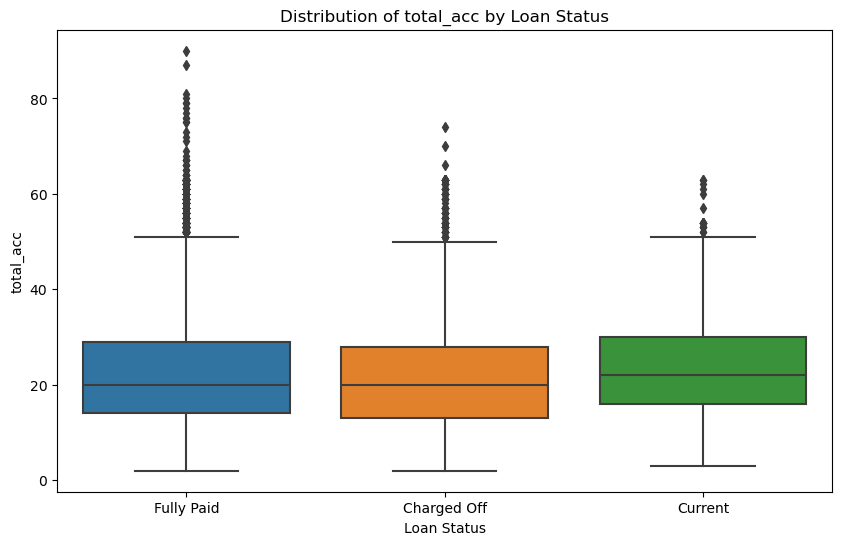

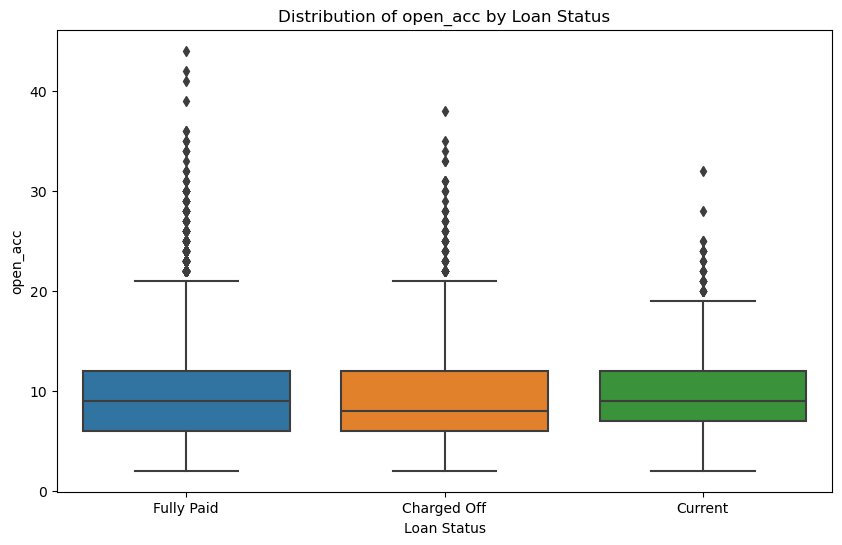

In [52]:
# Define a function to create box plots for continuous numerical variables against loan status
for var in numerical_variables:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='loan_status', y=var)
        plt.title(f'Distribution of {var} by Loan Status')
        plt.xlabel('Loan Status')
        plt.ylabel(var)
        plt.show()

<h1 style="font-size: 17px; color: blue;">Numerical Bivariant Inference</h1>


- **Loan Amount (loan_amnt):**
  - For both charged-off and fully paid loans, there is a wide range of loan amounts.
  - The median loan amount for charged-off loans appears slightly higher compared to fully paid loans, indicating that borrowers with larger loan amounts might have a higher likelihood of default.
  
- **Funded Amount (funded_amnt):**
  - Similar to loan amount, there is variability in funded amounts for both charged-off and fully paid loans.
  - The median funded amount for charged-off loans is also slightly higher compared to fully paid loans.
  
  
- **Monthly Installment (installment):**
  - The distribution of monthly installments is wider for charged-off loans compared to fully paid loans.
  - There are outliers with higher monthly installments in both categories, which might indicate loans with higher interest rates or longer terms.
  
- **Annual Income (annual_inc):**
  - Charged-off loans seem to have slightly lower median annual incomes compared to fully paid loans.
  - There is a wider spread of annual incomes for charged-off loans, suggesting that borrowers with varying income levels may default.
  - **Annual Income (annual_inc):**
  - Charged-off loans seem to have slightly lower median annual incomes compared to fully paid loans.
  - There is a wider spread of annual incomes for charged-off loans, suggesting that borrowers with varying income levels may default.
  
- **Debt-to-Income Ratio (dti):**
  - The debt-to-income ratio distributions for both loan statuses are similar, with some outliers indicating high DTI ratios.
  - There doesn't seem to be a significant difference in median DTI ratios between charged-off and fully paid loans.
 
    
- **Number of Open Credit Lines (revol):**
  - Charged-off loans tend to have a slightly higher median number of open credit lines compared to fully paid loans.
  - However, both distributions have a wide spread, indicating variability in the number of open credit lines.
  


<h1 style="font-size: 17px; color: blue;">Time Bivariant Analysis</h1>


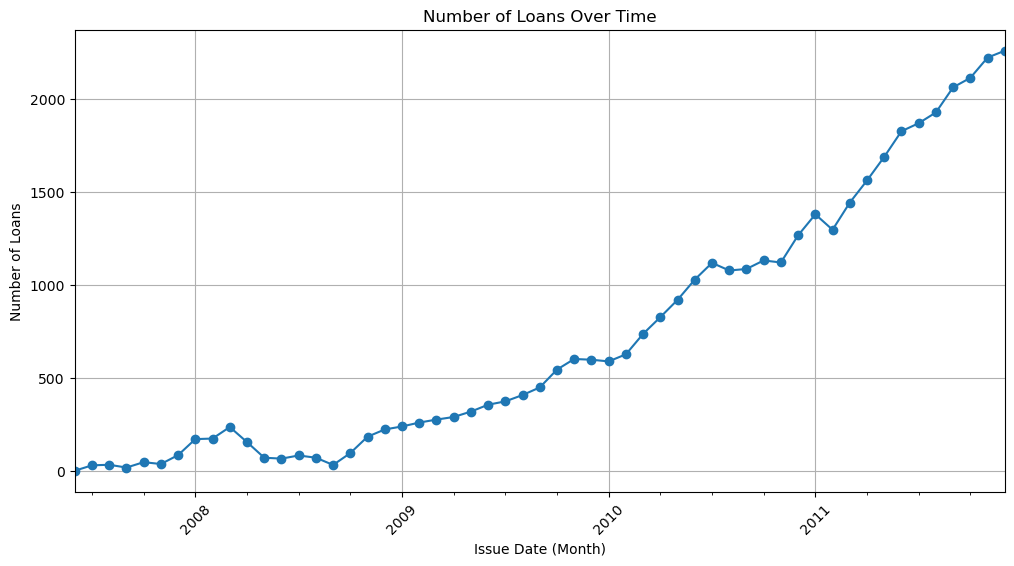

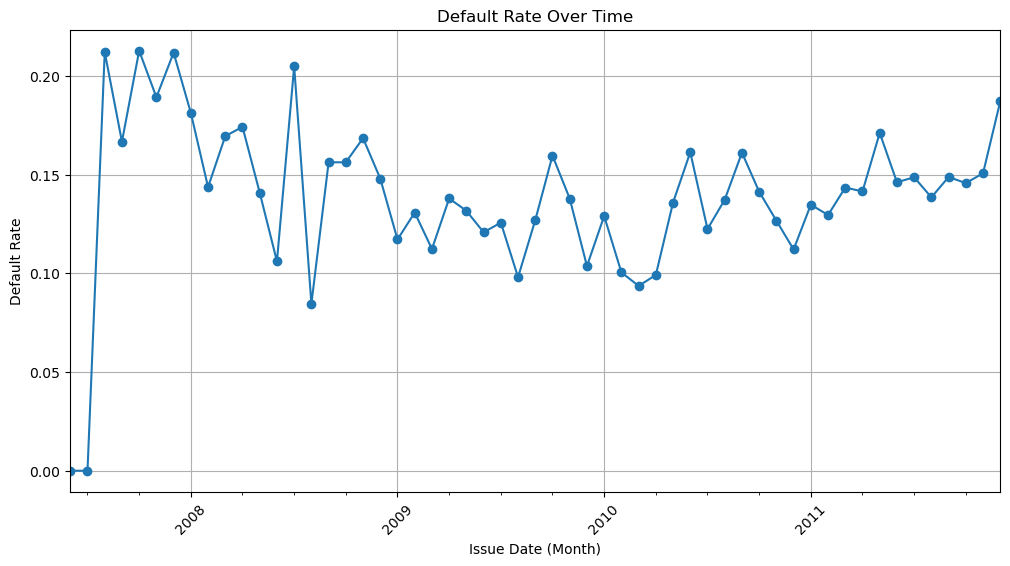

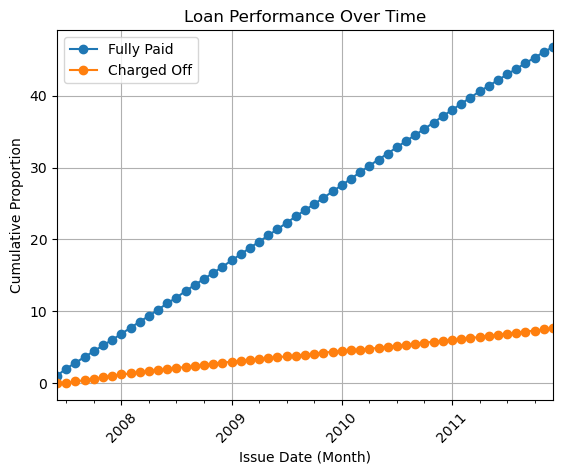

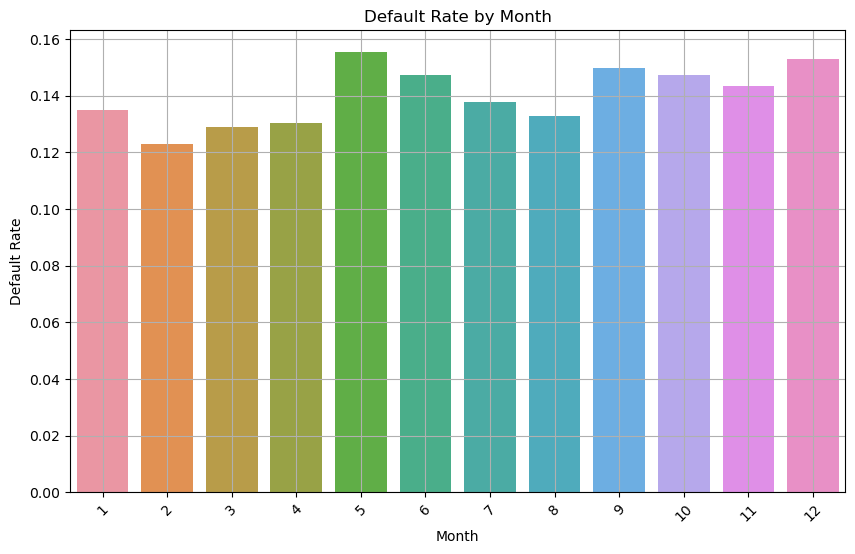

In [81]:
# Convert 'issue_d' column to datetime format
# Check for missing data in the 'issue_d' column
missing_issue_d = df['issue_d'].isnull().any()

# Print the result
if missing_issue_d:
    print("The 'issue_d' column contains missing data.")
    # Replace missing values in the 'issue_d' column with the earliest date in the dataset
earliest_date = df['issue_d'].min()
df['issue_d'].fillna(earliest_date, inplace=True)

try:
    df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
except Exception as e:
    print("Error:", e)

# Trend Analysis: Number of loans over time
plt.figure(figsize=(12, 6))
df.groupby(df['issue_d'].dt.to_period('M')).size().plot(marker='o')
plt.title('Number of Loans Over Time')
plt.xlabel('Issue Date (Month)')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Default Rate Over Time
default_rate = df.groupby(df['issue_d'].dt.to_period('M'))['loan_status'].value_counts(normalize=True).unstack().fillna(0)['Charged Off']
plt.figure(figsize=(12, 6))
default_rate.plot(marker='o')
plt.title('Default Rate Over Time')
plt.xlabel('Issue Date (Month)')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Loan Performance by Issuance Date
performance = df.groupby(df['issue_d'].dt.to_period('M'))['loan_status'].value_counts(normalize=True).unstack().fillna(0)
performance['Fully Paid'].cumsum().plot(marker='o', label='Fully Paid')
performance['Charged Off'].cumsum().plot(marker='o', label='Charged Off')
plt.title('Loan Performance Over Time')
plt.xlabel('Issue Date (Month)')
plt.ylabel('Cumulative Proportion')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Seasonal Analysis
default_rate_by_month = df.groupby(df['issue_d'].dt.month)['loan_status'].value_counts(normalize=True).unstack().fillna(0)['Charged Off']
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rate_by_month.index, y=default_rate_by_month.values)
plt.title('Default Rate by Month')
plt.xlabel('Month')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h1 style="font-size: 17px; color: blue;">Time Bivariant Inference</h1>


**Trend Analysis - Number of Loans Over Time:**
- The plot of the number of loans over time reveals an upward trend in loan volume, indicating consistent growth in lending activities throughout the analyzed period.

**Default Rate Over Time:**
- The default rate over time exhibits fluctuations, with periods of both higher and lower default rates. This variability suggests that external factors or shifts in lending practices may influence default rates over time.

**Loan Performance by Issuance Date:**
- The plot illustrating loan performance over time showcases the cumulative proportion of fully paid and charged-off loans since issuance. It underscores the evolving performance of the loan portfolio, characterized by a gradual increase in fully paid loans and occasional spikes in charged-off loans.

**Seasonal Analysis - Default Rate by Month:**
- The analysis of default rates by month unveils potential seasonal patterns. Notably, default rates may surge during specific months of the year, possibly influenced by seasonal factors.


<h1 style="font-size: 17px; color: blue;">Corelation for Bivariant Analysis</h1>


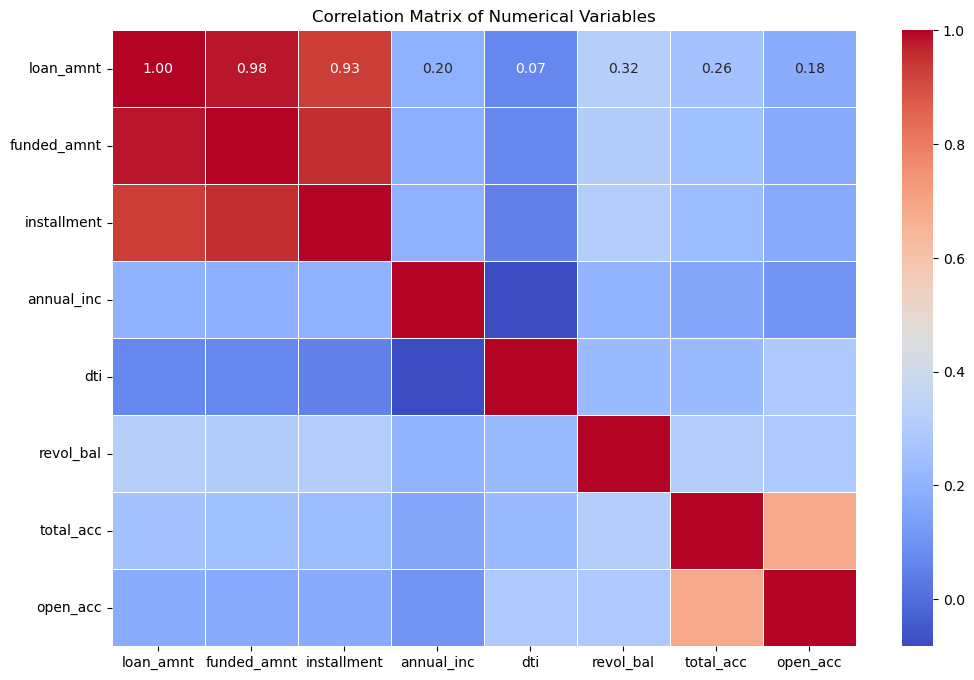

In [53]:
# Compute the correlation matrix for numerical variables
correlation_matrix = df[numerical_variables].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

<h1 style="font-size: 17px; color: blue;">Corelation for Bivariant Analysis</h1>


- **Loan Amount and Funded Amount:**
  - There is a strong positive correlation between loan amount and funded amount, which is expected since funded amount is typically equal to or slightly lower than the requested loan amount.
  
- **Loan Amount and Installment:**
  - There is a moderate positive correlation between loan amount and installment, indicating that larger loan amounts are associated with higher installment payments.
  
- **Loan Amount and Annual Income:**
  - There is a weak positive correlation between loan amount and annual income, suggesting that borrowers with higher incomes may tend to apply for larger loan amounts.
  
- **Loan Amount and Total Balance Excluding Mortgage:**
  - There is a weak positive correlation between loan amount and total balance excluding mortgage, indicating that borrowers with higher existing balances may apply for larger loans.
  
  
- **Revolving Balance and Total Credit Limit:**
  - There is a strong positive correlation between revolving balance and total credit limit, suggesting that borrowers with higher total credit limits tend to have higher revolving balances.
  
- **Total Balance Excluding Mortgage and Annual Income:**
  - There is a weak positive correlation between total balance excluding mortgage and annual income, indicating that borrowers with higher incomes may tend to have higher total balances excluding mortgage.


<h1 style="font-size: 17px; color: blue;">Insights</h1>


- **Risk Factors Identification:** Certain borrower attributes (e.g., lower credit scores, higher debt-to-income ratios) and loan characteristics (e.g., longer terms, larger loan amounts) are associated with increased default risk.

- **Targeted Risk Mitigation:** By focusing on high-risk borrower segments and adjusting lending criteria accordingly, we can mitigate credit risk and optimize portfolio performance.

- **Enhanced Decision-Making:** Leveraging predictive models incorporating key risk factors can improve loan underwriting processes and inform strategic decisions in risk management.
